# import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import Dataset

In [51]:
df = pd.read_csv("all_matches.csv", low_memory=False)
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,433558,2010/11,2011-02-19,Shere Bangla National Stadium,1,0.1,India,Bangladesh,V Sehwag,SR Tendulkar,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,433558,2010/11,2011-02-19,Shere Bangla National Stadium,1,0.2,India,Bangladesh,V Sehwag,SR Tendulkar,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,433558,2010/11,2011-02-19,Shere Bangla National Stadium,1,0.3,India,Bangladesh,V Sehwag,SR Tendulkar,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,433558,2010/11,2011-02-19,Shere Bangla National Stadium,1,0.4,India,Bangladesh,V Sehwag,SR Tendulkar,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,433558,2010/11,2011-02-19,Shere Bangla National Stadium,1,0.5,India,Bangladesh,V Sehwag,SR Tendulkar,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154138,1384436,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.1,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154139,1384436,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.2,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154140,1384436,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.3,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154141,1384436,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.4,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['start_date'] = pd.to_datetime(df['start_date'])

quarter_semi_final_final_df = df.sort_values(by='start_date').groupby('season').tail(3)

print(quarter_semi_final_final_df)

        match_id   season start_date                                venue  \
127646     65286  2002/03 2003-03-23  New Wanderers Stadium, Johannesburg   
127647     65286  2002/03 2003-03-23  New Wanderers Stadium, Johannesburg   
127642     65286  2002/03 2003-03-23  New Wanderers Stadium, Johannesburg   
77604     247507  2006/07 2007-04-28          Kensington Oval, Bridgetown   
77616     247507  2006/07 2007-04-28          Kensington Oval, Bridgetown   
77535     247507  2006/07 2007-04-28          Kensington Oval, Bridgetown   
25933     433606  2010/11 2011-04-02                     Wankhede Stadium   
25935     433606  2010/11 2011-04-02                     Wankhede Stadium   
25934     433606  2010/11 2011-04-02                     Wankhede Stadium   
51705     656495  2014/15 2015-03-29             Melbourne Cricket Ground   
51707     656495  2014/15 2015-03-29             Melbourne Cricket Ground   
51706     656495  2014/15 2015-03-29             Melbourne Cricket Ground   

# extracting SF and finalists from all seasons

In [9]:
df['start_date'] = pd.to_datetime(df['start_date'])

last_three_dates = (df.groupby('season')['start_date'].apply(lambda x: x.drop_duplicates().nlargest(3)).reset_index(drop=True))

filtered_df = df[df['start_date'].isin(last_three_dates)]

filtered_df.head(), filtered_df.shape

(       match_id   season start_date                venue  innings  ball  \
 24231    433604  2010/11 2011-03-29  R Premadasa Stadium        1   0.1   
 24232    433604  2010/11 2011-03-29  R Premadasa Stadium        1   0.2   
 24233    433604  2010/11 2011-03-29  R Premadasa Stadium        1   0.3   
 24234    433604  2010/11 2011-03-29  R Premadasa Stadium        1   0.4   
 24235    433604  2010/11 2011-03-29  R Premadasa Stadium        1   0.5   
 
       batting_team bowling_team     striker  non_striker  ... extras  wides  \
 24231  New Zealand    Sri Lanka  MJ Guptill  BB McCullum  ...      0    NaN   
 24232  New Zealand    Sri Lanka  MJ Guptill  BB McCullum  ...      0    NaN   
 24233  New Zealand    Sri Lanka  MJ Guptill  BB McCullum  ...      0    NaN   
 24234  New Zealand    Sri Lanka  MJ Guptill  BB McCullum  ...      0    NaN   
 24235  New Zealand    Sri Lanka  MJ Guptill  BB McCullum  ...      0    NaN   
 
        noballs  byes  legbyes  penalty  wicket_type  player

In [10]:
filtered_df.to_excel("Matches_season_data.xlsx")

In [11]:
filtered_df.shape

(10158, 22)

In [12]:
filtered_df.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                      9896
noballs                   10114
byes                      10137
legbyes                   10048
penalty                   10158
wicket_type                9899
player_dismissed           9899
other_wicket_type         10158
other_player_dismissed    10158
dtype: int64

In [13]:
# Remove all columns between column index 1 to 3
filtered_df.drop(filtered_df.iloc[:, 13:22], inplace=True, axis=1)


C:\Users\Asus\AppData\Local\Temp\ipykernel_22488\2203418845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df.iloc[:, 13:22], inplace=True, axis=1)


In [14]:
filtered_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras'],
      dtype='object')

In [15]:
filtered_df["runs_off_bat"].value_counts()

runs_off_bat
0    5693
1    3009
4     729
2     502
6     173
3      51
5       1
Name: count, dtype: int64

In [16]:
filtered_df.isnull().sum()

match_id        0
season          0
start_date      0
venue           0
innings         0
ball            0
batting_team    0
bowling_team    0
striker         0
non_striker     0
bowler          0
runs_off_bat    0
extras          0
dtype: int64

In [17]:
filtered_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
24231,433604,2010/11,2011-03-29,R Premadasa Stadium,1,0.1,New Zealand,Sri Lanka,MJ Guptill,BB McCullum,SL Malinga,0,0
24232,433604,2010/11,2011-03-29,R Premadasa Stadium,1,0.2,New Zealand,Sri Lanka,MJ Guptill,BB McCullum,SL Malinga,0,0
24233,433604,2010/11,2011-03-29,R Premadasa Stadium,1,0.3,New Zealand,Sri Lanka,MJ Guptill,BB McCullum,SL Malinga,0,0
24234,433604,2010/11,2011-03-29,R Premadasa Stadium,1,0.4,New Zealand,Sri Lanka,MJ Guptill,BB McCullum,SL Malinga,0,0
24235,433604,2010/11,2011-03-29,R Premadasa Stadium,1,0.5,New Zealand,Sri Lanka,MJ Guptill,BB McCullum,SL Malinga,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153533,1384439,2023/24,2023-11-19,"Narendra Modi Stadium, Ahmedabad",2,42.2,Australia,India,TM Head,M Labuschagne,Mohammed Siraj,4,0
153534,1384439,2023/24,2023-11-19,"Narendra Modi Stadium, Ahmedabad",2,42.3,Australia,India,TM Head,M Labuschagne,Mohammed Siraj,1,0
153535,1384439,2023/24,2023-11-19,"Narendra Modi Stadium, Ahmedabad",2,42.4,Australia,India,M Labuschagne,TM Head,Mohammed Siraj,1,0
153536,1384439,2023/24,2023-11-19,"Narendra Modi Stadium, Ahmedabad",2,42.5,Australia,India,TM Head,M Labuschagne,Mohammed Siraj,0,0


In [18]:
filtered_df.to_csv("filtered_df.csv")

In [19]:
# creating separate dataframe for each worldcup season

wc2003 = filtered_df[filtered_df["season"]=="2002/03"]
wc2007 = filtered_df[filtered_df["season"]=="2006/07"]
wc2011 = filtered_df[filtered_df["season"]=="2010/11"]
wc2015 = filtered_df[filtered_df["season"]=="2014/15"]
wc2019 = filtered_df[filtered_df["season"]=="2019"]
wc2023 = filtered_df[filtered_df["season"]=="2023/24"]

In [20]:
wc2003

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
126324,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.1,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126325,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.2,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126326,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.3,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126327,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.4,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126328,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.5,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128019,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.4,India,Australia,A Nehra,Z Khan,B Lee,0,0
128020,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.5,India,Australia,A Nehra,Z Khan,B Lee,4,0
128021,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.6,India,Australia,A Nehra,Z Khan,B Lee,4,0
128022,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,39.1,India,Australia,Z Khan,A Nehra,GD McGrath,0,0


In [21]:
# Group data by season to get some common traits
season_summary = df.groupby('season').agg({
    'match_id': 'nunique',  # Number of unique matches
    'runs_off_bat': 'sum',  # Total runs scored
    'extras': 'sum'         # Total extras
}).reset_index()

In [22]:
# Set up a seaborn style for visualizations
sns.set(style="whitegrid")

C:\Users\Asus\AppData\Local\Temp\ipykernel_22488\1368708053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='match_id', data=season_summary, palette='viridis',legend = False)


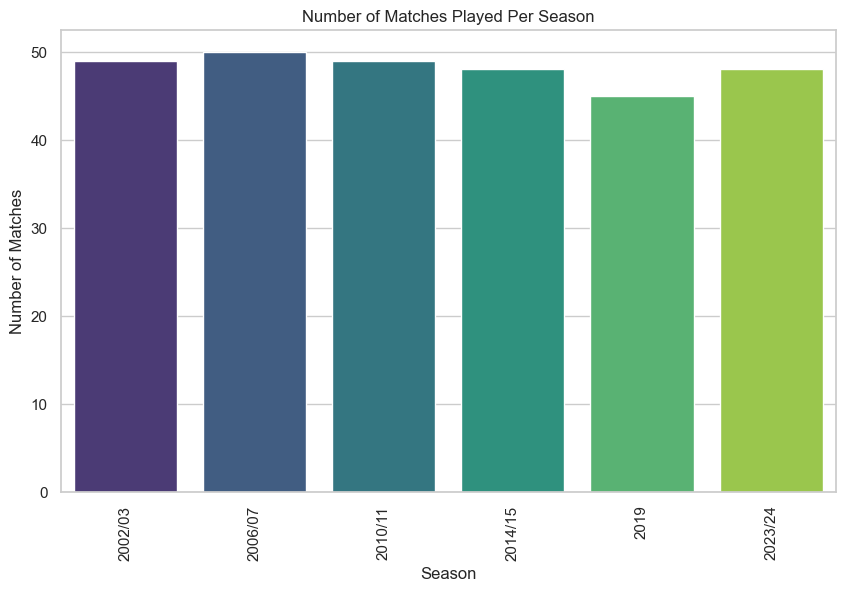

In [23]:
# ### 4.1 Matches Played Per Season
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='match_id', data=season_summary, palette='viridis',legend = False)
plt.title('Number of Matches Played Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

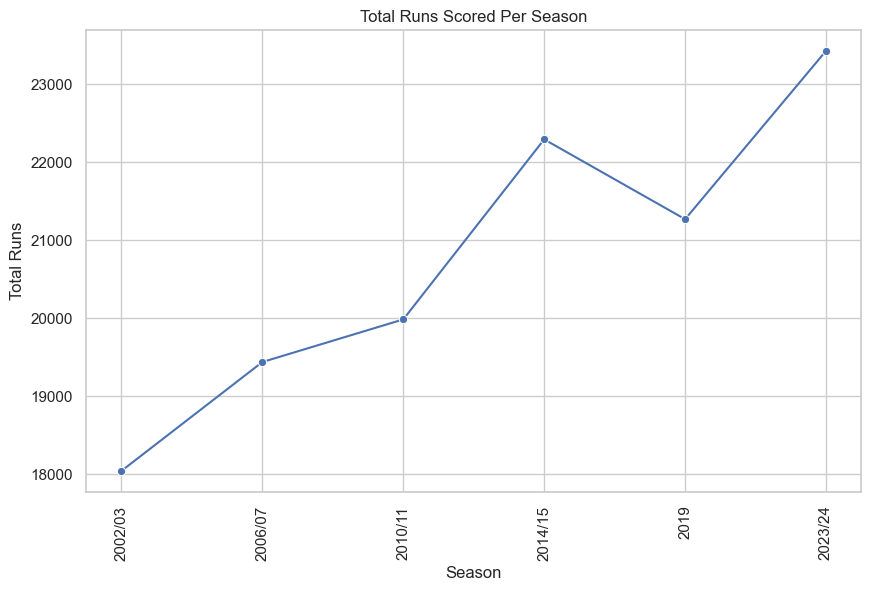

In [24]:

# ### 4.2 Runs Scored Per Season
plt.figure(figsize=(10,6))
sns.lineplot(x='season', y='runs_off_bat', data=season_summary, marker='o', color='b')
plt.title('Total Runs Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

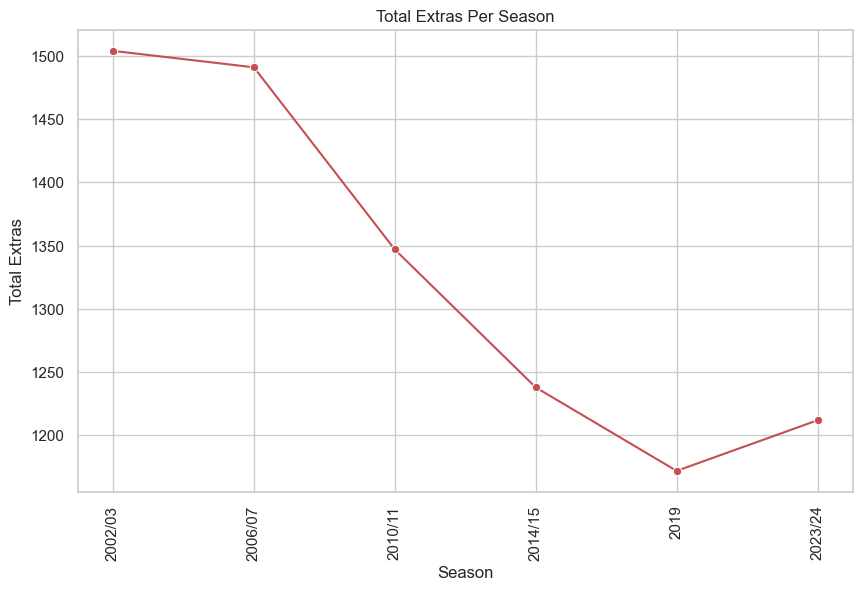

In [25]:
# ### 4.3 Extras Per Season
plt.figure(figsize=(10,6))
sns.lineplot(x='season', y='extras', data=season_summary, marker='o', color='r')
plt.title('Total Extras Per Season')
plt.xlabel('Season')
plt.ylabel('Total Extras')
plt.xticks(rotation=90)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22488\3621913890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='batting_team', y='runs_off_bat', palette='viridis')


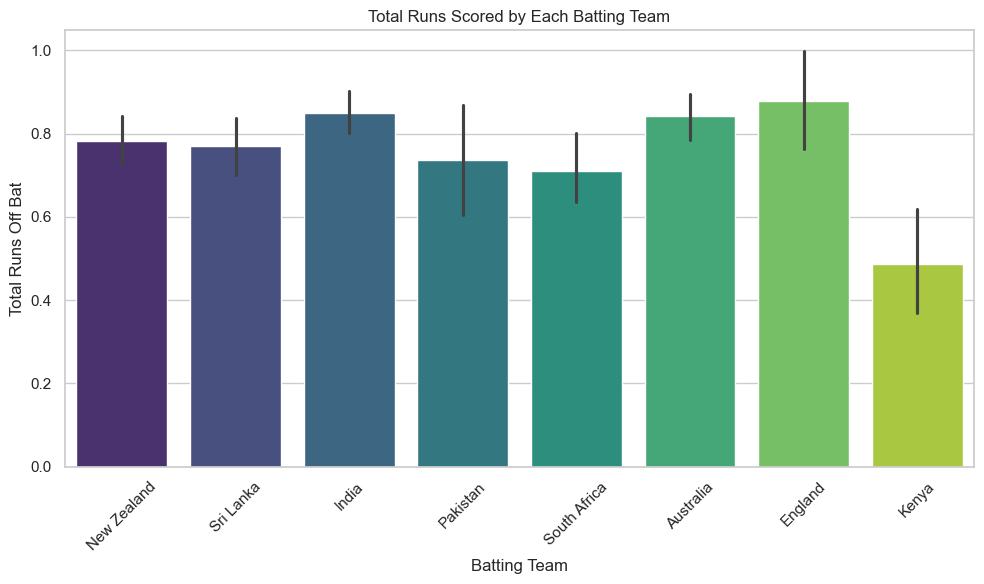

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='batting_team', y='runs_off_bat', palette='viridis')
plt.title('Total Runs Scored by Each Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs Off Bat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
wc2003

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
126324,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.1,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126325,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.2,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126326,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.3,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126327,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.4,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126328,65284,2002/03,2003-03-18,"St George's Park, Port Elizabeth",1,0.5,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128019,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.4,India,Australia,A Nehra,Z Khan,B Lee,0,0
128020,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.5,India,Australia,A Nehra,Z Khan,B Lee,4,0
128021,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.6,India,Australia,A Nehra,Z Khan,B Lee,4,0
128022,65286,2002/03,2003-03-23,"New Wanderers Stadium, Johannesburg",2,39.1,India,Australia,Z Khan,A Nehra,GD McGrath,0,0


In [28]:
wc2003['season'].replace('2002/03','2003', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_22488\4084699622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc2003['season'].replace('2002/03','2003', inplace=True)


In [29]:
wc2003

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras
126324,65284,2003,2003-03-18,"St George's Park, Port Elizabeth",1,0.1,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126325,65284,2003,2003-03-18,"St George's Park, Port Elizabeth",1,0.2,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126326,65284,2003,2003-03-18,"St George's Park, Port Elizabeth",1,0.3,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126327,65284,2003,2003-03-18,"St George's Park, Port Elizabeth",1,0.4,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,0
126328,65284,2003,2003-03-18,"St George's Park, Port Elizabeth",1,0.5,Australia,Sri Lanka,AC Gilchrist,ML Hayden,WPUJC Vaas,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128019,65286,2003,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.4,India,Australia,A Nehra,Z Khan,B Lee,0,0
128020,65286,2003,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.5,India,Australia,A Nehra,Z Khan,B Lee,4,0
128021,65286,2003,2003-03-23,"New Wanderers Stadium, Johannesburg",2,38.6,India,Australia,A Nehra,Z Khan,B Lee,4,0
128022,65286,2003,2003-03-23,"New Wanderers Stadium, Johannesburg",2,39.1,India,Australia,Z Khan,A Nehra,GD McGrath,0,0


In [30]:
wc2003.select_dtypes(include=np.number).corr()

,match_id,innings,ball,runs_off_bat,extras
match_id,1.000000,0.002872,0.001478,0.113995,0.071852
innings,0.002872,1.000000,-0.147811,-0.096076,0.037578
ball,0.001478,-0.147811,1.000000,0.109234,-0.006854
runs_off_bat,0.113995,-0.096076,0.109234,1.000000,-0.091215
extras,0.071852,0.037578,-0.006854,-0.091215,1.000000


In [31]:
wc2003['runs_off_bat'].mean()

0.7370588235294118

<Axes: xlabel='runs_off_bat', ylabel='Count'>

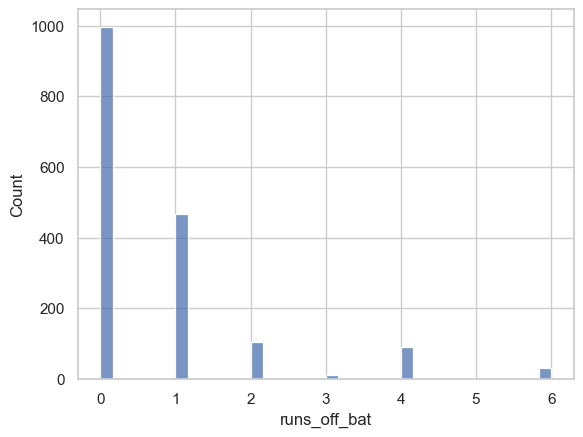

In [32]:
sns.histplot(wc2003['runs_off_bat'])

<Axes: xlabel='extras', ylabel='Count'>

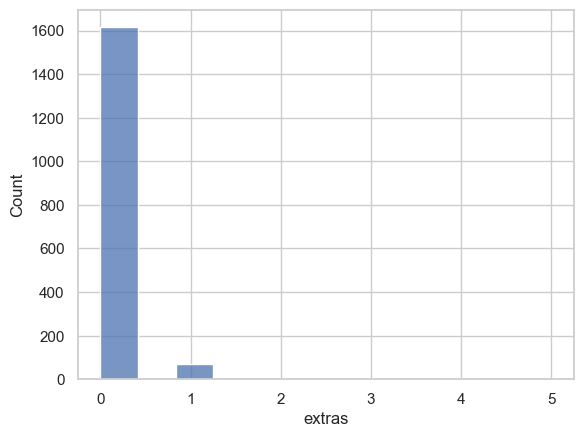

In [33]:
sns.histplot(wc2003['extras'])

<Axes: xlabel='runs_off_bat', ylabel='Count'>

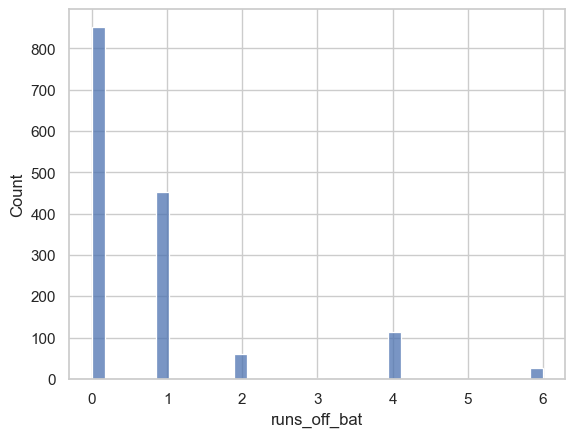

In [34]:
sns.histplot(wc2007['runs_off_bat'])

<Axes: xlabel='extras', ylabel='Count'>

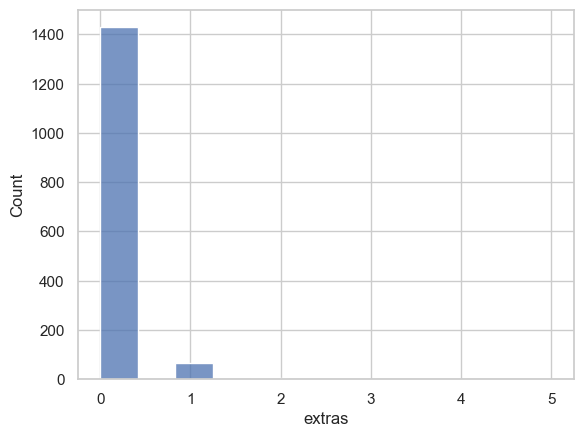

In [35]:
sns.histplot(wc2007['extras'])

<Axes: xlabel='runs_off_bat', ylabel='Count'>

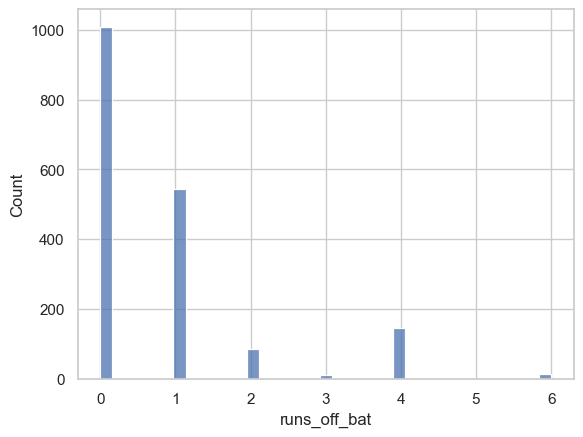

In [36]:
sns.histplot(wc2011['runs_off_bat'])

<Axes: xlabel='extras', ylabel='Count'>

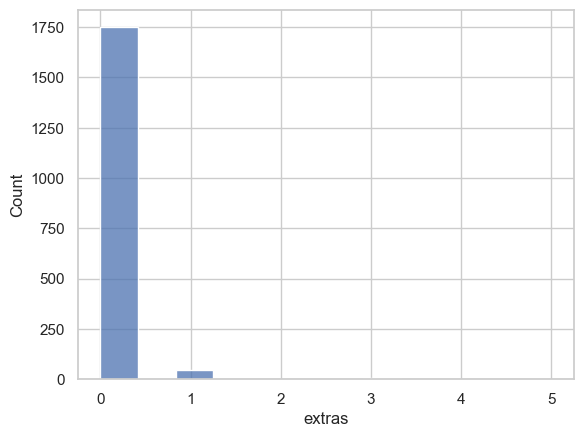

In [37]:
sns.histplot(wc2011['extras'])

<Axes: xlabel='runs_off_bat', ylabel='Count'>

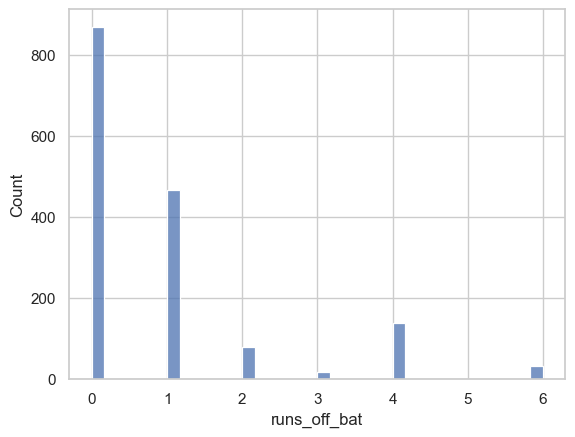

In [38]:
sns.histplot(wc2015['runs_off_bat'])

<Axes: xlabel='extras', ylabel='Count'>

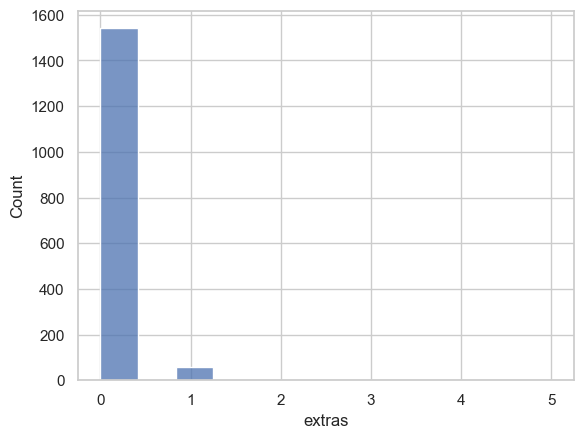

In [39]:
sns.histplot(wc2015['extras'])

<Axes: xlabel='runs_off_bat', ylabel='Count'>

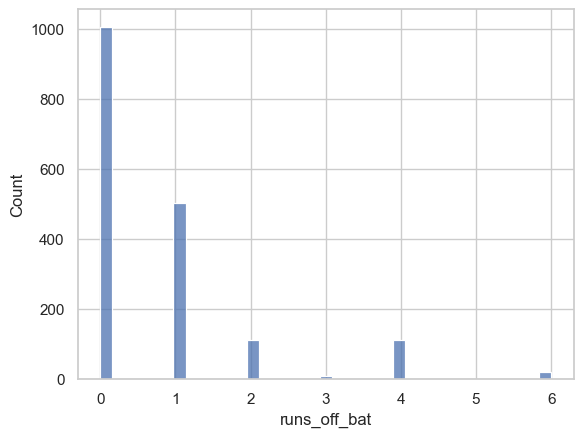

In [40]:
sns.histplot(wc2019['runs_off_bat'])

<Axes: xlabel='extras', ylabel='Count'>

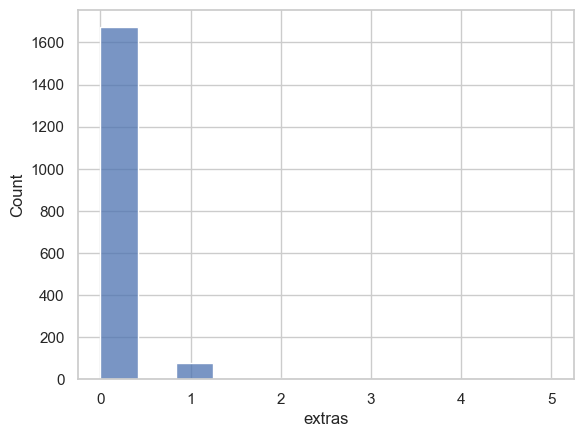

In [41]:
sns.histplot(wc2019['extras'])

<Axes: xlabel='runs_off_bat', ylabel='Count'>

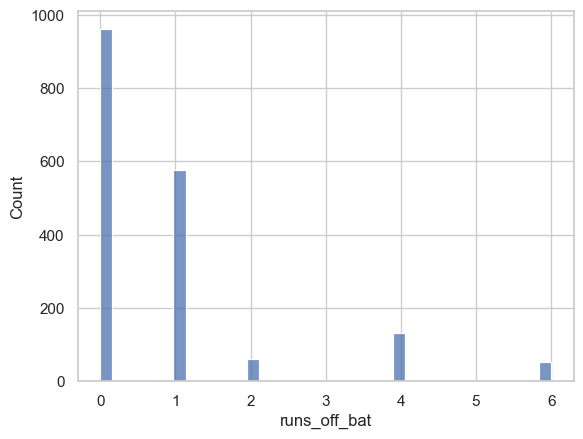

In [42]:
sns.histplot(wc2023['runs_off_bat'])

<Axes: xlabel='extras', ylabel='Count'>

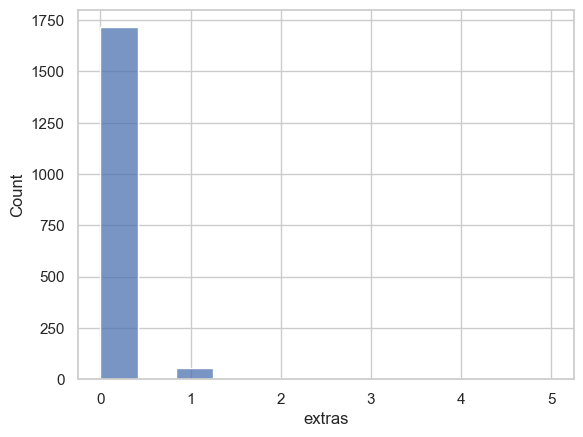

In [43]:
sns.histplot(wc2023['extras'])

In [45]:
filtered_df.groupby(filtered_df['bowler'])